In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [2]:
df_read = pd.read_csv('final.csv')
df_read['id'] = df_read.index

In [3]:
df = df_read[['xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', 'xlhv_5', 'xlhv_6',
         'drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6',
         'dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6',
         'sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6', 'Label', 'id']]

In [4]:
dynamic_df = df_read[['xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', 'xlhv_5', 'xlhv_6',
         'drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6',
         'dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6',
         'sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6', 'id']]

# Chuyển đổi định dạng

In [5]:
# Chuyển đổi DataFrame từ định dạng rộng sang định dạng dài
df_melted_xlhv = df.melt(id_vars=['id'], value_vars=['xlhv_1', 'xlhv_2', 'xlhv_3', 'xlhv_4', 'xlhv_5', 'xlhv_6'], var_name='hocky', value_name='xlhv')
df_melted_drl = df.melt(id_vars=['id'], value_vars=['drl_1', 'drl_2', 'drl_3', 'drl_4', 'drl_5', 'drl_6'], var_name='hocky', value_name='drl')
df_melted_dtbhk = df.melt(id_vars=['id'], value_vars=['dtbhk_1', 'dtbhk_2', 'dtbhk_3', 'dtbhk_4', 'dtbhk_5', 'dtbhk_6'], var_name='hocky', value_name='dtbhk')
df_melted_sotchk = df.melt(id_vars=['id'], value_vars=['sotchk_1', 'sotchk_2', 'sotchk_3', 'sotchk_4', 'sotchk_5', 'sotchk_6'], var_name='hocky', value_name='sotchk')

# Kết hợp các DataFrame đã melt lại với nhau
df_combined = pd.concat([df_melted_xlhv, df_melted_drl,df_melted_dtbhk,df_melted_sotchk], axis=1)
df_combined=df_combined.loc[:, ~df_combined.columns.duplicated()]
# Tính toán cột time
df_combined['time'] = df_combined['hocky'].str.extract('(\d+)')[0].astype(int)


# Chọn các cột cần thiết và sắp xếp lại thứ tự các cột
df_final = df_combined[['id', 'time', 'xlhv', 'drl', 'dtbhk', 'sotchk']]

df_final=df_final.sort_values(by=['id','time'],ignore_index=True)
display(df_final.info())
display(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20166 non-null  int64  
 1   time    20166 non-null  int64  
 2   xlhv    20166 non-null  float64
 3   drl     20166 non-null  object 
 4   dtbhk   20166 non-null  float64
 5   sotchk  20166 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 945.4+ KB


None

,id,time,xlhv,drl,dtbhk,sotchk
0,0,1,0.0,Xuat Sac,6.02,22.0
1,0,2,0.0,Kha,7.03,18.0
2,0,3,0.0,Kha,6.40,26.0
3,0,4,0.0,Gioi,7.01,19.0
4,0,5,0.0,Xuat Sac,6.35,20.0


In [6]:
# Merge df_final with df_read[['id', 'Label']] on 'id'
df_merged = pd.merge(df_final, df_read[['id', 'Label']], on='id', how='left')

# Display info and head of the merged DataFrame
display(df_merged.info())
display(df_merged.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20166 non-null  int64  
 1   time    20166 non-null  int64  
 2   xlhv    20166 non-null  float64
 3   drl     20166 non-null  object 
 4   dtbhk   20166 non-null  float64
 5   sotchk  20166 non-null  float64
 6   Label   20166 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


None

,id,time,xlhv,drl,dtbhk,sotchk,Label
0,0,1,0.0,Xuat Sac,6.02,22.0,TreHan
1,0,2,0.0,Kha,7.03,18.0,TreHan
2,0,3,0.0,Kha,6.40,26.0,TreHan
3,0,4,0.0,Gioi,7.01,19.0,TreHan
4,0,5,0.0,Xuat Sac,6.35,20.0,TreHan


# Encode

In [7]:
encoding_mapping = {
    'Xuat Sac': 5,
    'Gioi': 4,
    'Kha': 3,
    'Trung Binh': 2,
    'Yeu': 1,
    'Kem': 0
}

df_merged['drl'] = df_merged['drl'].map(encoding_mapping)

In [8]:
encoding_mapping = {
    'TreHan': 0,
    'DungHan': 1
}

df_merged['Label'] = df_merged['Label'].map(encoding_mapping)

# Scale data

In [9]:
# Scale xlhv from [min, max] to [0, 1]
min_xlhv = df_merged['xlhv'].min()
max_xlhv = df_merged['xlhv'].max()
df_merged['xlhv'] = (df_merged['xlhv'] - min_xlhv) / (max_xlhv - min_xlhv)

# Scale drl from [min, max] to [0, 1] (assuming drl is now numerical after encoding)
min_drl = df_merged['drl'].min()
max_drl = df_merged['drl'].max()
df_merged['drl'] = (df_merged['drl'] - min_drl) / (max_drl - min_drl)

# Scale dtbhk from [0, 10] to [0, 1]
df_merged['dtbhk'] = df_merged['dtbhk'] / 10

# Scale sotchk from [min, max] to [0, 1]
min_sotchk = df_merged['sotchk'].min()
max_sotchk = df_merged['sotchk'].max()
df_merged['sotchk'] = (df_merged['sotchk'] - min_sotchk) / (max_sotchk - min_sotchk)

display(df_merged.head())

,id,time,xlhv,drl,dtbhk,sotchk,Label
0,0,1,0.0,1.0,0.602,0.487179,0
1,0,2,0.0,0.6,0.703,0.384615,0
2,0,3,0.0,0.6,0.640,0.589744,0
3,0,4,0.0,0.8,0.701,0.410256,0
4,0,5,0.0,1.0,0.635,0.435897,0


# Build graph

In [10]:
import networkx as nx

## Find threholds

In [11]:
G = []
t = 0
G.append(nx.Graph())
for _, row in df_merged.iterrows():
    if (row["time"] == 6):
        G[t].add_node(row["id"], att1=row["xlhv"], att2=row["drl"], att3=row["dtbhk"], att4=row["sotchk"], att5=t, label=row["Label"])

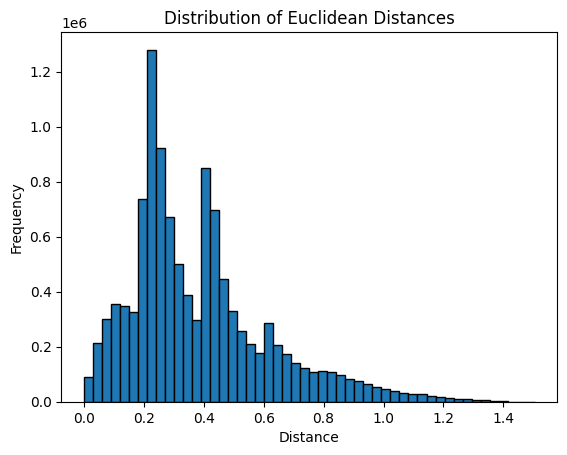

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Collect distances
distances = []
for node1 in G[t].nodes:
    for node2 in G[t].nodes:
        if node1 != node2:
            attributes1 = np.array([G[t].nodes[node1]["att1"], G[t].nodes[node1]["att2"], G[t].nodes[node1]["att3"], G[t].nodes[node1]["att4"]])
            attributes2 = np.array([G[t].nodes[node2]["att1"], G[t].nodes[node2]["att2"], G[t].nodes[node2]["att3"], G[t].nodes[node2]["att4"]])
            dist = np.linalg.norm(attributes1 - attributes2)
            distances.append(dist)

# Plot histogram of distances
plt.hist(distances, bins=50, edgecolor='black')
plt.title('Distribution of Euclidean Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [13]:
full_graph_feature = 1
G = []
t = 0
G.append(nx.Graph())
del full_graph_feature

In [14]:
for t in range(1, 7):
    G.append(nx.Graph())

    # Add nodes from the timeline data
    for _, row in df_merged.iterrows():
        if (row["time"] == t):
            G[t].add_node(row["id"], att1=row["xlhv"], att2=row["drl"], att3=row["dtbhk"], att4=row["sotchk"], att5=t, label=row["Label"])

    # Add edges based on similarity (example: connect nodes if attributes are similar)
    threshold = 0.1  # Threshold to connect nodes based on similarity
    for node1 in G[t].nodes:
        for node2 in G[t].nodes:
            if node1 != node2:
                attributes1 = np.array([G[t].nodes[node1]["att1"], G[t].nodes[node1]["att2"], G[t].nodes[node1]["att3"], G[t].nodes[node1]["att4"]])
                attributes2 = np.array([G[t].nodes[node2]["att1"], G[t].nodes[node2]["att2"], G[t].nodes[node2]["att3"], G[t].nodes[node2]["att4"]])

                # Calculate Euclidean distance between attributes
                dist = np.linalg.norm(attributes1 - attributes2)

                # If distance is below threshold, add an edge
                if dist < threshold:
                    G[t].add_edge(node1, node2)
    num_edges = G[t].number_of_edges()
    num_nodes = G[t].number_of_nodes()

    print("Number of edges:", num_edges)
    print("Number of vertices:", num_nodes)

    nx.write_gexf(G[t], f"graph{t}.gexf")
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G[t])

    # Calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G[t])

    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G[t])

    # Create a new DataFrame with graph-based features
    graph_features = pd.DataFrame({
        "id": list(G[t].nodes),
        "time": [G[t].nodes[node]["att5"] for node in G[t].nodes],
        "degree": [degree_centrality[node] for node in G[t].nodes],
        "closeness": [closeness_centrality[node] for node in G[t].nodes],
        "betweenness": [betweenness_centrality[node] for node in G[t].nodes]
    })

    if 'full_graph_feature' not in locals():
        full_graph_feature = graph_features
    else:
        full_graph_feature = pd.concat([full_graph_feature, graph_features], ignore_index=True)

Number of edges: 368335
Number of vertices: 3361
Number of edges: 337253
Number of vertices: 3361
Number of edges: 405801
Number of vertices: 3361
Number of edges: 352799
Number of vertices: 3361
Number of edges: 319640
Number of vertices: 3361
Number of edges: 344518
Number of vertices: 3361


In [26]:
full_graph_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20166 non-null  float64
 1   time         20166 non-null  int64  
 2   degree       20166 non-null  float64
 3   closeness    20166 non-null  float64
 4   betweenness  20166 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 787.9 KB


In [28]:
full_graph_feature[20:30]

,id,time,degree,closeness,betweenness
20,20.0,1,0.058333,0.095568,0.000052
21,21.0,1,0.055060,0.115983,0.000115
22,22.0,1,0.046726,0.085008,0.000019
23,23.0,1,0.038393,0.079933,0.000045
24,24.0,1,0.057143,0.093703,0.000042
25,25.0,1,0.055060,0.091667,0.000038
26,26.0,1,0.061012,0.114021,0.000078
27,27.0,1,0.054762,0.106688,0.000047
28,28.0,1,0.058631,0.110407,0.000048
29,29.0,1,0.032143,0.136163,0.000135


In [30]:
# prompt: megre df_merged with  graph_features by [id, time]

# Merge df_merged with graph_features
df_final_merged = pd.merge(df_merged, full_graph_feature, on=['id', 'time'], how='left')

# Display info and head of the final merged DataFrame
display(df_final_merged.info())
display(df_final_merged.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20166 non-null  int64  
 1   time         20166 non-null  int64  
 2   xlhv         20166 non-null  float64
 3   drl          20166 non-null  float64
 4   dtbhk        20166 non-null  float64
 5   sotchk       20166 non-null  float64
 6   Label        20166 non-null  int64  
 7   degree       20166 non-null  float64
 8   closeness    20166 non-null  float64
 9   betweenness  20166 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.5 MB


None

,id,time,xlhv,drl,dtbhk,sotchk,Label,degree,closeness,betweenness
0,0,1,0.0,1.0,0.602,0.487179,0,0.039286,0.080071,0.000049
1,0,2,0.0,0.6,0.703,0.384615,0,0.121131,0.177543,0.000206
2,0,3,0.0,0.6,0.640,0.589744,0,0.071429,0.140874,0.000115
3,0,4,0.0,0.8,0.701,0.410256,0,0.097024,0.142320,0.000130
4,0,5,0.0,1.0,0.635,0.435897,0,0.029167,0.079103,0.000021


# Group data to train RNN model base on current information

In [31]:
# Group data by 'id'
grouped = df_final_merged.groupby("id")

# Prepare sequences (X) and labels (y)
sequence_length = 5  # Number of time steps per sequence
X = []
y = []

for _, group in grouped:
    group = group.sort_values("time")  # Ensure correct order
    features = group[["degree", "closeness", "betweenness", "xlhv", "drl", "dtbhk", "sotchk"]].values  # Extract attributes as numpy array
    label = group["Label"].iloc[0]  # Get label for this id (assume the label is constant for each id)

    # Create sequences (X) and associate with the label (y)
    for i in range(len(features) - sequence_length):
        X.append(features[i:i + sequence_length])  # Input sequence
        y.append(label)  # Use the label as the target

X = np.array(X)  # Shape: (num_samples, sequence_length, num_features)
y = np.array(y)  # Shape: (num_samples,)

print("Input shape (X):", X.shape)  # (num_samples, 5, 7)
print("Target shape (y):", y.shape)  # (num_samples,)

Input shape (X): (3361, 5, 7)
Target shape (y): (3361,)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model (for binary classification in this example)
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(sequence_length, 4)),  # 5 time steps, 4 features
    Dense(1, activation='sigmoid')  # Binary classification (1 output for the label)
])

# Compile the model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train[:, :, 3:], y_train, epochs=50, batch_size=16, verbose=2)
# X[:, :, 3:] remove first 3 column "degree", "closeness", "betweenness"

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


168/168 - 2s - 10ms/step - accuracy: 0.7232 - loss: 0.5837
Epoch 2/50
168/168 - 1s - 4ms/step - accuracy: 0.7400 - loss: 0.5378
Epoch 3/50
168/168 - 1s - 4ms/step - accuracy: 0.7448 - loss: 0.5201
Epoch 4/50
168/168 - 0s - 2ms/step - accuracy: 0.7526 - loss: 0.5085
Epoch 5/50
168/168 - 1s - 4ms/step - accuracy: 0.7519 - loss: 0.5064
Epoch 6/50
168/168 - 0s - 2ms/step - accuracy: 0.7548 - loss: 0.5012
Epoch 7/50
168/168 - 1s - 4ms/step - accuracy: 0.7560 - loss: 0.4945
Epoch 8/50
168/168 - 0s - 2ms/step - accuracy: 0.7511 - loss: 0.4963
Epoch 9/50
168/168 - 0s - 2ms/step - accuracy: 0.7664 - loss: 0.4856
Epoch 10/50
168/168 - 0s - 2ms/step - accuracy: 0.7626 - loss: 0.4787
Epoch 11/50
168/168 - 0s - 2ms/step - accuracy: 0.7760 - loss: 0.4734
Epoch 12/50
168/168 - 1s - 5ms/step - accuracy: 0.7675 - loss: 0.4732
Epoch 13/50
168/168 - 1s - 4ms/step - accuracy: 0.7615 - loss: 0.4796
Epoch 14/50
168/168 - 1s - 4ms/step - accuracy: 0.7675 - loss: 0.4768
Epoch 15/50
168/168 - 1s - 7ms/step - a

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_test[:, :, 3:]) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, F1 score, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Accuracy: 0.787518573551263
F1 Score: 0.47232472324723246
Recall: 0.3902439024390244
Confusion Matrix:
[[466  43]
 [100  64]]


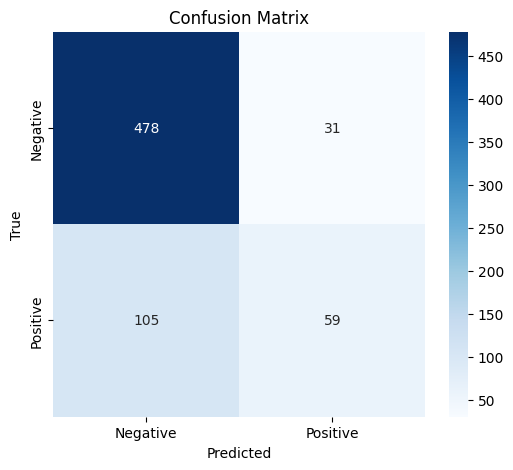

In [44]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Build RNN model base on graph infomation

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model (for binary classification in this example)
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(sequence_length, 3)),  # 5 time steps, 4 features
    Dense(1, activation='sigmoid')  # Binary classification (1 output for the label)
])

# Compile the model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train[:, :, :3], y_train, epochs=50, batch_size=16, verbose=2)
# X[:, :, :3] take first 3 column "degree", "closeness", "betweenness"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
168/168 - 5s - 30ms/step - accuracy: 0.7113 - loss: 0.6019
Epoch 2/50
168/168 - 0s - 2ms/step - accuracy: 0.7388 - loss: 0.5644
Epoch 3/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5578
Epoch 4/50
168/168 - 0s - 2ms/step - accuracy: 0.7388 - loss: 0.5466
Epoch 5/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5414
Epoch 6/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5393
Epoch 7/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5344
Epoch 8/50
168/168 - 0s - 2ms/step - accuracy: 0.7388 - loss: 0.5298
Epoch 9/50
168/168 - 1s - 3ms/step - accuracy: 0.7388 - loss: 0.5320
Epoch 10/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5281
Epoch 11/50
168/168 - 0s - 2ms/step - accuracy: 0.7388 - loss: 0.5281
Epoch 12/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5291
Epoch 13/50
168/168 - 0s - 2ms/step - accuracy: 0.7388 - loss: 0.5268
Epoch 14/50
168/168 - 1s - 4ms/step - accuracy: 0.7388 - loss: 0.5229
Epoch 15/50
168/168 - 1s - 3

In [36]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_test[:, :, :3]) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, F1 score, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.7607726597325408
F1 Score: 0.12972972972972974
Recall: 0.07317073170731707
Confusion Matrix:
[[500   9]
 [152  12]]


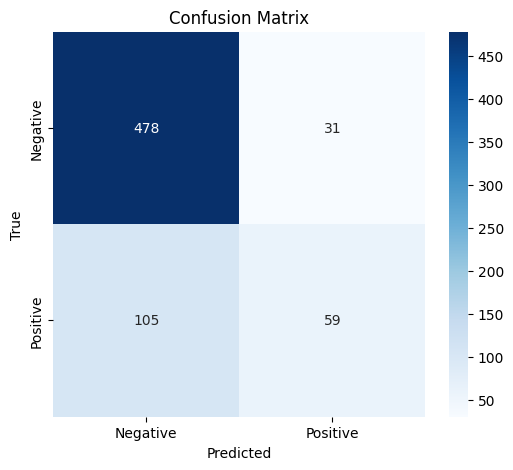

In [43]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Build RNN model base on both infomation

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model (for binary classification in this example)
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=(sequence_length, 7)),  # 5 time steps, 7 features
    Dense(1, activation='sigmoid')  # Binary classification (1 output for the label)
])

# Compile the model for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


168/168 - 2s - 10ms/step - accuracy: 0.7385 - loss: 0.5803
Epoch 2/50
168/168 - 0s - 2ms/step - accuracy: 0.7470 - loss: 0.5265
Epoch 3/50
168/168 - 1s - 4ms/step - accuracy: 0.7571 - loss: 0.5033
Epoch 4/50
168/168 - 1s - 4ms/step - accuracy: 0.7608 - loss: 0.5011
Epoch 5/50
168/168 - 0s - 2ms/step - accuracy: 0.7563 - loss: 0.4960
Epoch 6/50
168/168 - 0s - 2ms/step - accuracy: 0.7623 - loss: 0.4858
Epoch 7/50
168/168 - 0s - 2ms/step - accuracy: 0.7716 - loss: 0.4846
Epoch 8/50
168/168 - 1s - 4ms/step - accuracy: 0.7645 - loss: 0.4804
Epoch 9/50
168/168 - 1s - 4ms/step - accuracy: 0.7690 - loss: 0.4781
Epoch 10/50
168/168 - 1s - 4ms/step - accuracy: 0.7679 - loss: 0.4742
Epoch 11/50
168/168 - 1s - 7ms/step - accuracy: 0.7786 - loss: 0.4729
Epoch 12/50
168/168 - 1s - 4ms/step - accuracy: 0.7746 - loss: 0.4682
Epoch 13/50
168/168 - 1s - 7ms/step - accuracy: 0.7719 - loss: 0.4675
Epoch 14/50
168/168 - 0s - 3ms/step - accuracy: 0.7723 - loss: 0.4675
Epoch 15/50
168/168 - 1s - 6ms/step - a

In [39]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy, F1 score, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.7979197622585439
F1 Score: 0.4645669291338583
Recall: 0.3597560975609756
Confusion Matrix:
[[478  31]
 [105  59]]


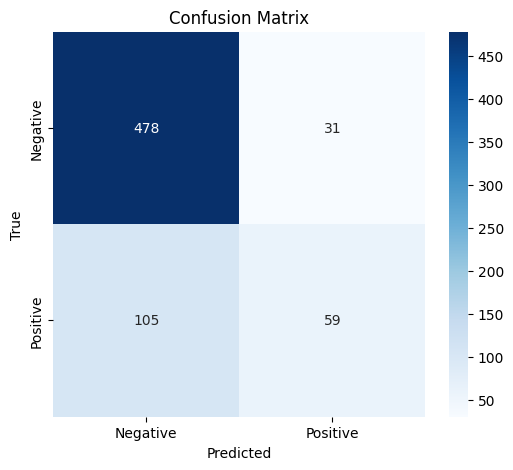

In [42]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()